In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import EasyFit

In [73]:
importlib.reload(EasyFit)


<module 'EasyFit' from 'C:\\Dropbox\\Programming\\Python\\EasyFit\\EasyFit.py'>

# Test 1, lorentzian

In [131]:
amp = 2000
bg = 100
FWHM = 2
x0 = 1

x = np.linspace(-10,10,50)
y = amp/(1+(x-x0)**2/(FWHM/2)**2) + bg
y_noise = np.random.poisson(lam=y)

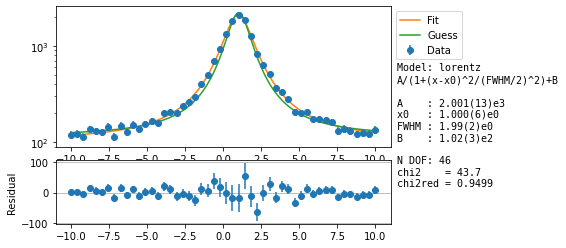

In [132]:
importlib.reload(EasyFit)
fit_lorentz = EasyFit.fit_wratter('lorentz',x,y_noise, dy=np.sqrt(y_noise))
fit_lorentz.fit()
fit_lorentz.plot(N=200, plot_guess = True, plot_residuals=True, use_log=True)

In [114]:
fit_lorentz.model

namespace(f=<function FitModels.func_lorentz(x, A, x0, FWHM, B)>,
          guess=<function FitModels.guess_lorentz(x, y)>,
          string='A/(1+(x-x0)^2/(FWHM/2)^2)+B',
          tex='$\\frac{A}{1+(x-x0)^2/(FWHM/2)^2}+B$',
          bounds=<function FitModels.bounds_lorentz(x, y)>)

In [6]:
fit_lorentz.params

array([1.96476594e+03, 9.87393071e-01, 2.02008662e+00, 2.03013840e+02])

In [7]:
fit_lorentz.errors

array([1.38090440e+01, 7.08267781e-03, 2.36888288e-02, 3.76096252e+00])

# Test 2, exp decay

In [119]:
amp = 2000
bg = 10
Gamma = 1

x = np.linspace(0,10,500)
y = amp*np.exp(-x*Gamma) + bg
y_noise = np.random.poisson(lam=y)

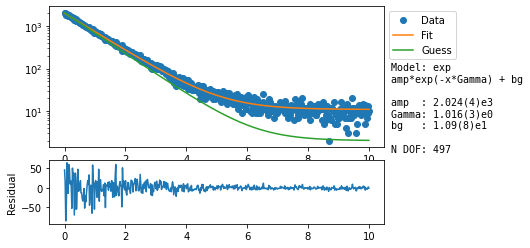

In [120]:
importlib.reload(EasyFit)
fit_exp = EasyFit.fit_wratter('exp',x,y_noise)
fit_exp.fit()
fit_exp.plot(plot_guess = True, use_log = True, plot_residuals=True)

In [10]:
fit_exp.bounds is None

True

# Test 3, sine

In [137]:
amp = 0.5
bg = np.random.uniform(-3, 3)
f = np.random.uniform(2, 4)
phi = np.random.uniform(0, 2**np.pi)

x = np.linspace(0,2,100)
y = EasyFit.FitModels.sin.f(x, amp, f, phi, bg)
y_noise = y + np.random.normal(scale=0.1, size=x.size)

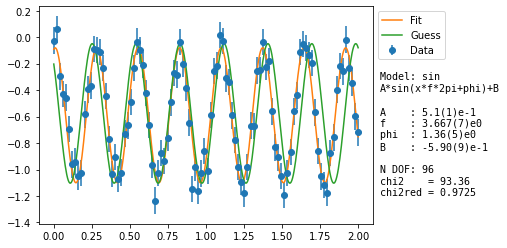

In [138]:
importlib.reload(EasyFit)
fit_sin = EasyFit.fit_wratter('sin',x,y_noise, dy=0.1)
fit_sin.fit()
fit_sin.plot(N=400, plot_guess=True)